In [1]:
####Explanation available in the main .py
%matplotlib notebook
import random
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
random.seed(195470)
style.use('fivethirtyeight')
import os

class tsp():
    def __init__(self,fName):
        self.fName = fName
        self.data = {}
        self.tour = []
        self.init_tour = []
        self.distance = None
        self.bestMove = None
        
    def euclideanDistance(self, c1, c2):
        """
        Distance between two cities
        """
        d1 = self.data[c1]
        d2 = self.data[c2]
        return math.sqrt( (d1[0]-d2[0])**2 + (d1[1]-d2[1])**2 )


    def InitializeTour(self):
        self.readInstance()
        datac = self.data.copy()
        keys_ = list(datac.keys())
        random.shuffle(keys_)
        self.tour = keys_
        self.init_tour = keys_
        return keys_

    def readInstance(self):
        """
        Reading an instance from fName
        """
        THIS_FOLDER = os.getcwd()
        my_file = os.path.join(THIS_FOLDER, self.fName)
        file = open(my_file, 'r')
        self.genSize = int(file.readline())
        self.data = {}
        for line in file:
            (cid, x, y) = line.split()
            self.data[int(cid)] = (int(x), int(y))
        file.close()
        
    def getTourCost(self):
        return self.distance
    
    
    def SwapCost(self,i,j,T):
        T_new = self.UpdateTour(T,[i-1,j+1])
        return self.computeTourCost_noSave(T_new)
    
    def computeTourCost_noSave(self,T):
        distance  = self.euclideanDistance(T[0], T[len(T)-1])
        for i in range(1, len(T)-1):
            distance += self.euclideanDistance(T[i], T[i+1])
        return distance

    def computeTourCost(self,T):
        self.distance  = self.euclideanDistance(T[0], T[len(T)-1])
        for i in range(1, len(T)-1):
            self.distance += self.euclideanDistance(T[i], T[i+1])
        return self.distance

    def UpdateTour(self,T, bestMove): 
        i,j =  bestMove
        a = T[:]
        a[i:j]=T[j - 1:i - 1:-1]
        return a

    def basic_two_opt_search(self):
        fig = plt.figure(figsize=(10,10))
        ax1 = fig.add_subplot(1,1,1)
        plt.ion()
        fig.show()
        self.tour = self.InitializeTour()
        ax1.clear()
        X = []
        y = []
        for i in self.tour:
            X.append(self.data[i][0])
            y.append(self.data[i][1])
        X.append(self.data[1][0])
        y.append(self.data[1][1])
        ax1.plot(X,y,color='#4b0082',linewidth=0.3)
        ax1.scatter(X,y,c="gold", s=200, marker=".",linewidth=2, edgecolor='k')
        plt.title(f"{self.fName} TSP BASIC 2 OPT")
        plt.savefig(f'plots/{self.fName} TSP BASIC 2 OPT INITIAL.png')
        fig.canvas.draw()
        notOpt = True
        n = len(self.tour)
        while notOpt:
            notOpt = False
            i=1
            currBest = self.computeTourCost(self.tour)
            while i < n-2:
                j=i+2
                while j < n:
                    D = self.SwapCost(i + 1, j - 1, self.tour)
                    if D < currBest:
                        bestMove = [i,j]
                        currBest = D
                        notOpt = True
                    j+=1
                i+=1
            if notOpt:
                self.tour = self.UpdateTour(self.tour, bestMove)
                ax1.clear()
                X = []
                y = []
                for i in self.tour:
                    X.append(self.data[i][0])
                    y.append(self.data[i][1])
                X.append(self.data[1][0])
                y.append(self.data[1][1])
                plt.title(f"{self.fName} TSP BASIC 2 OPT")
                ax1.plot(X,y,color='#4b0082',linewidth=0.3)
                ax1.scatter(X,y,c="gold", s=200, marker=".",linewidth=2, edgecolor='k')
                fig.canvas.draw()
                plt.savefig(f'plots/{self.fName} TSP BASIC 2 OPT SOLVED.png')
                print("Best Move",bestMove)
                print("Tour Cost",self.computeTourCost(self.tour))


    def var_1_edge_two_opt_search(self,Threshold=15,seed=195470):
        random.seed(seed)
        fig = plt.figure(figsize=(10,10))
        ax1 = fig.add_subplot(1,1,1)
        plt.ion()
        fig.show()
        self.tour = self.InitializeTour()
        ax1.clear()
        X = []
        y = []
        for i in self.tour:
            X.append(self.data[i][0])
            y.append(self.data[i][1])
        X.append(self.data[1][0])
        y.append(self.data[1][1])
        ax1.plot(X,y,color='#4b0082',linewidth=0.3)
        ax1.scatter(X,y,c="gold", s=200, marker=".",linewidth=2, edgecolor='k')
        plt.title(f"{self.fName} TSP VAR 1")
        plt.savefig(f'plots/{self.fName} TSP VAR 1 INIT.png')
        fig.canvas.draw()
        notOpt = True
        n = len(self.tour)
        count = 0
        while True:
            notOpt = False
            i=random.randint(1,n-1)#Choose random edge to find swappable edge
            currBest = self.computeTourCost(self.tour)
            j=1
            while j < n:
                if abs(j-i)<=1:#if j&i make an edge or are the same, skip it
                    j+=1
                    continue
                D = self.SwapCost(i + 1, j - 1, self.tour)
                if D < currBest:
                    bestMove = [i,j]
                    currBest = D
                    notOpt = True
                j+=1
            if not notOpt:
                count+=1
            if count>=Threshold:#To limit iterations without improvement
                break
            if notOpt:
                self.tour = self.UpdateTour(self.tour, bestMove)
                ax1.clear()
                X = []
                y = []
                for i in self.tour:
                    X.append(self.data[i][0])
                    y.append(self.data[i][1])
                X.append(self.data[1][0])
                y.append(self.data[1][1])
                ax1.plot(X,y,color='#4b0082',linewidth=0.3)
                ax1.scatter(X,y,c="gold", s=200, marker=".",linewidth=2, edgecolor='k')
                plt.title(f"{self.fName} TSP VAR 1")
                plt.savefig(f'plots/{self.fName} TSP VAR 1 SOLVED.png')
                fig.canvas.draw()
                print("Best Move",bestMove)
                print("Tour Cost",self.computeTourCost(self.tour))

    def var_2_first_edge_two_opt_search(self,Threshold=15,seed=195470):
        random.seed(seed)
        fig = plt.figure(figsize=(10,10))
        ax1 = fig.add_subplot(1,1,1)
        plt.ion()
        fig.show()
        self.tour = self.InitializeTour()
        ax1.clear()
        X = []
        y = []
        for i in self.tour:
            X.append(self.data[i][0])
            y.append(self.data[i][1])
        X.append(self.data[1][0])
        y.append(self.data[1][1])
        ax1.plot(X,y,color='#4b0082',linewidth=0.3)
        ax1.scatter(X,y,c="gold", s=200, marker=".",linewidth=2, edgecolor='k')
        plt.title(f"{self.fName} TSP VAR 2")
        plt.savefig(f'plots/{self.fName} TSP VAR 2 INIT.png')
        fig.canvas.draw()
        notOpt = True
        n = len(self.tour)
        count = 0
        while True:
            notOpt = False
            i=random.randint(1,n-1)#Choose random edge to find swappable edge
            currBest = self.computeTourCost(self.tour)
            j=1
            while j < n:
                if abs(j-i)<=1:#if j&i make an edge or are the same, skip it
                    j+=1
                    continue
                D = self.SwapCost(i + 1, j - 1, self.tour)
                if D < currBest:
                    bestMove = [i,j]
                    currBest = D
                    notOpt = True
                    break
                j+=1
            if not notOpt:
                count+=1
            if count>=Threshold:#To limit iterations without improvement
                break
            if notOpt:
                self.tour = self.UpdateTour(self.tour, bestMove)
                ax1.clear()
                X = []
                y = []
                for i in self.tour:
                    X.append(self.data[i][0])
                    y.append(self.data[i][1])
                X.append(self.data[1][0])
                y.append(self.data[1][1])
                ax1.plot(X,y,color='#4b0082',linewidth=0.3)
                ax1.scatter(X,y,c="gold", s=200, marker=".",linewidth=2, edgecolor='k')
                plt.title(f"{self.fName} TSP VAR 2")
                plt.savefig(f'plots/{self.fName} TSP VAR 2 SOLVED.png')
                fig.canvas.draw()
                print("Best Move",bestMove)
                print("Tour Cost",self.computeTourCost(self.tour))

<IPython.core.display.Javascript object>


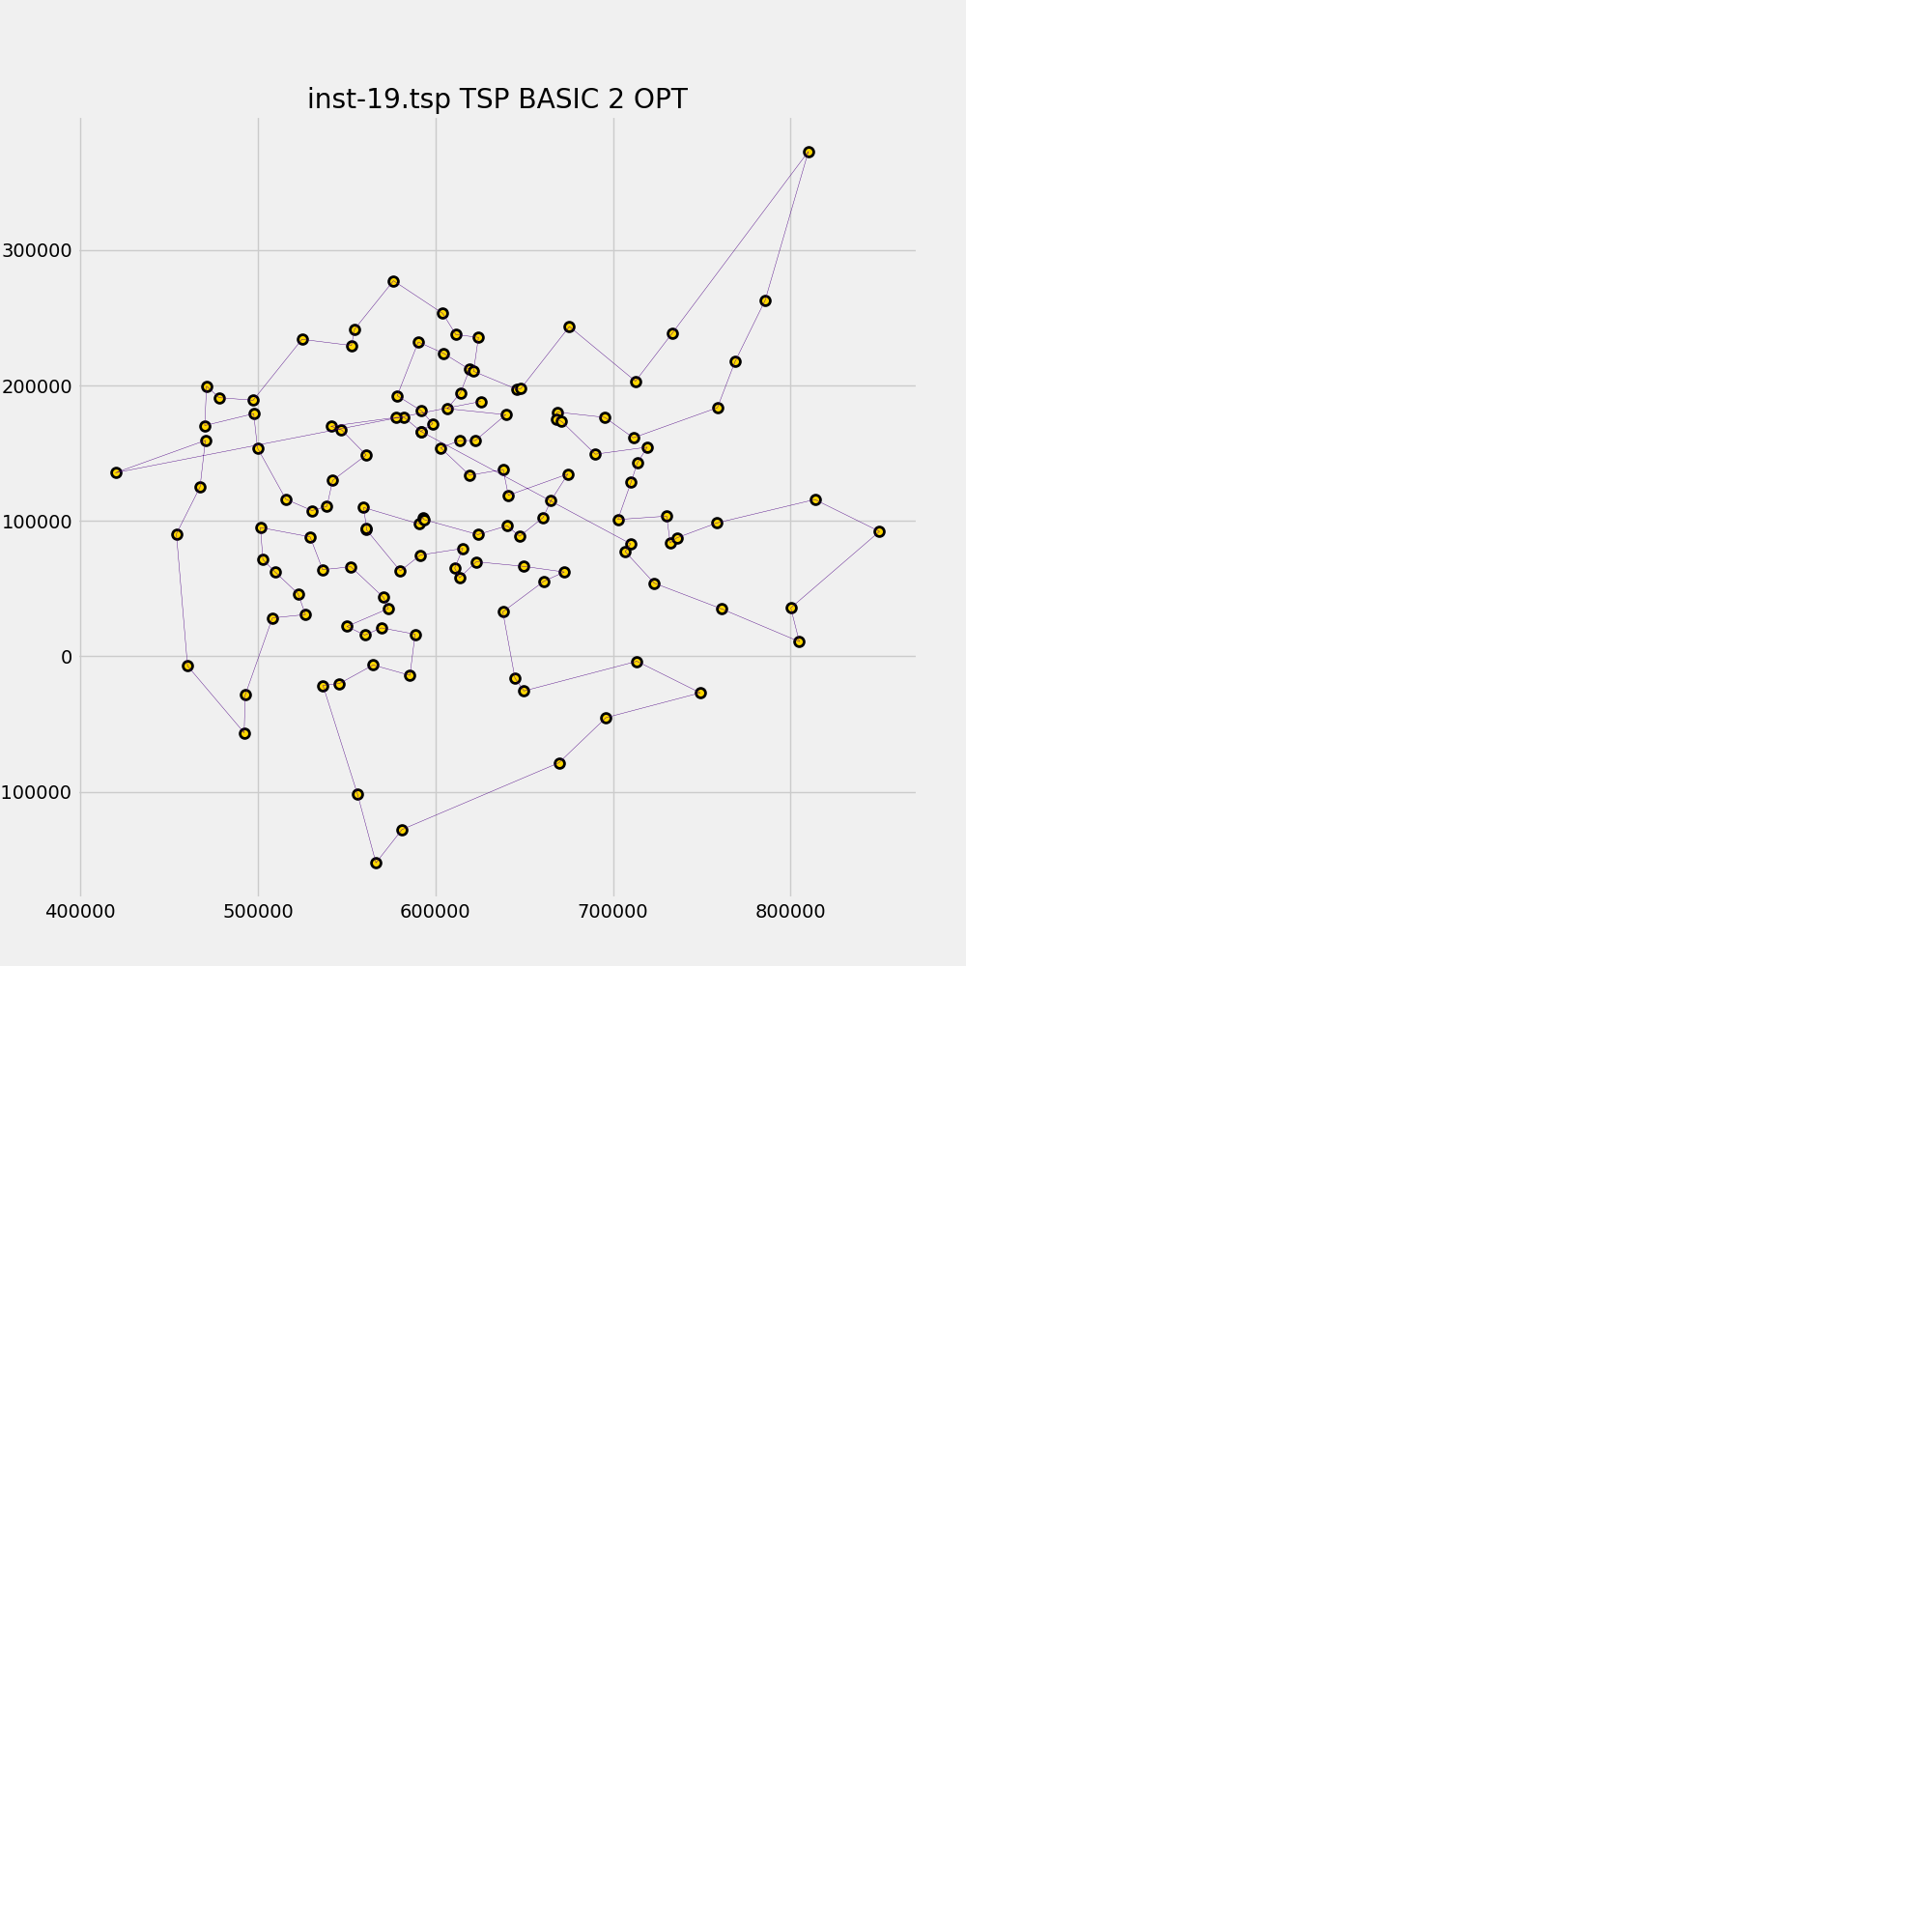

Best Move [10, 69]
Tour Cost 19219926.93473138
Best Move [47, 80]
Tour Cost 18763009.797162265
Best Move [69, 121]
Tour Cost 18307854.597675726
Best Move [33, 94]
Tour Cost 17834982.015642848
Best Move [93, 103]
Tour Cost 17436693.45806958
Best Move [41, 123]
Tour Cost 17045872.755478732
Best Move [40, 112]
Tour Cost 16574975.690509006
Best Move [92, 118]
Tour Cost 16159736.719374232
Best Move [9, 51]
Tour Cost 15794910.904077042
Best Move [36, 96]
Tour Cost 15410149.831094436
Best Move [7, 67]
Tour Cost 15023830.366381427
Best Move [36, 110]
Tour Cost 14664498.495467905
Best Move [61, 115]
Tour Cost 14309273.42719662
Best Move [28, 65]
Tour Cost 13939135.998972991
Best Move [17, 63]
Tour Cost 13585598.765789622
Best Move [27, 86]
Tour Cost 13244110.54972977
Best Move [66, 109]
Tour Cost 12959248.889623864
Best Move [3, 82]
Tour Cost 12681303.566281661
Best Move [10, 122]
Tour Cost 12417782.630637577
Best Move [69, 96]
Tour Cost 12164126.023724088
Best Move [24, 80]
Tour Cost 11889158.

<IPython.core.display.Javascript object>


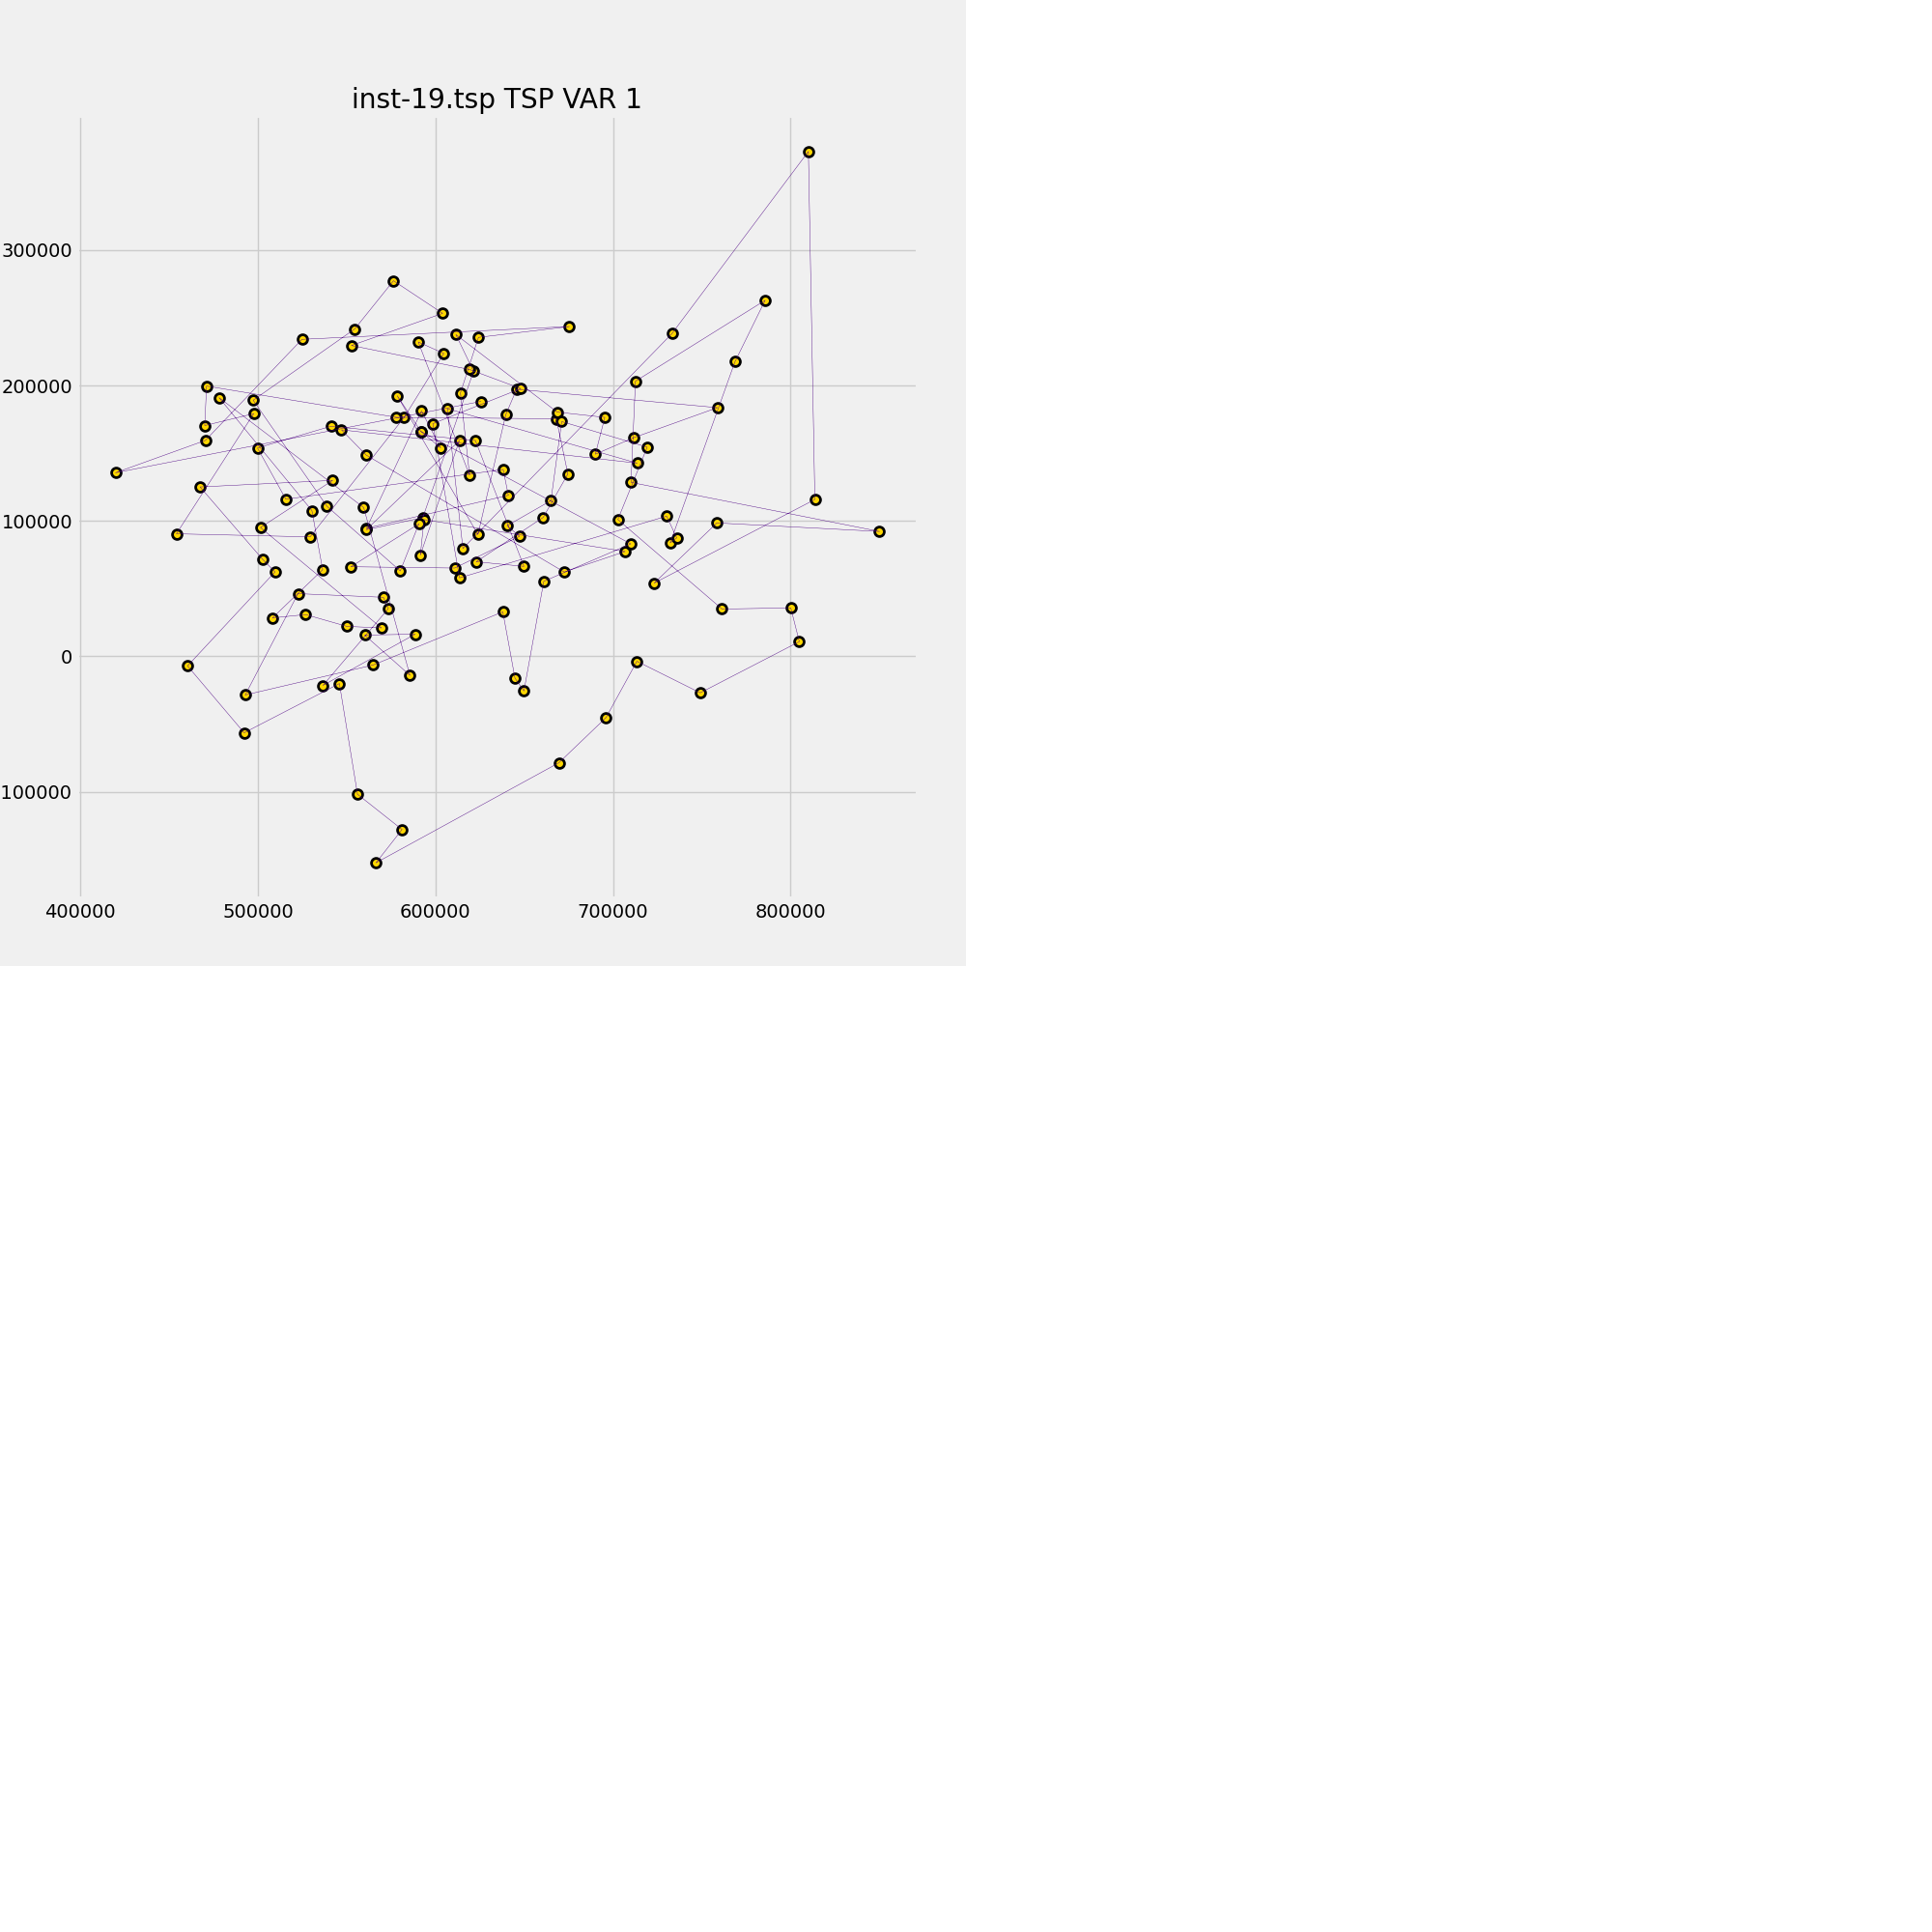

Best Move [52, 123]
Tour Cost 19581223.63185435
Best Move [30, 106]
Tour Cost 19246561.868652686
Best Move [80, 124]
Tour Cost 19209432.431837317
Best Move [44, 95]
Tour Cost 18854207.363566022
Best Move [101, 107]
Tour Cost 18779352.174986262
Best Move [52, 69]
Tour Cost 18565225.46103321
Best Move [20, 113]
Tour Cost 18375974.97219794
Best Move [27, 105]
Tour Cost 18186767.717602104
Best Move [113, 125]
Tour Cost 18032328.978992973
Best Move [18, 37]
Tour Cost 17735419.00780042
Best Move [79, 83]
Tour Cost 17574903.41388746
Best Move [30, 66]
Tour Cost 17479963.02924139
Best Move [56, 99]
Tour Cost 17023045.89167228
Best Move [35, 43]
Tour Cost 16877163.644364513
Best Move [99, 101]
Tour Cost 16848662.718248833
Best Move [33, 116]
Tour Cost 16800049.522679176
Best Move [111, 119]
Tour Cost 16595926.438090367
Best Move [82, 105]
Tour Cost 16332950.669890804
Best Move [117, 121]
Tour Cost 16131040.311414681
Best Move [57, 122]
Tour Cost 16048039.34790866
Best Move [85, 110]
Tour Cost 1

<IPython.core.display.Javascript object>


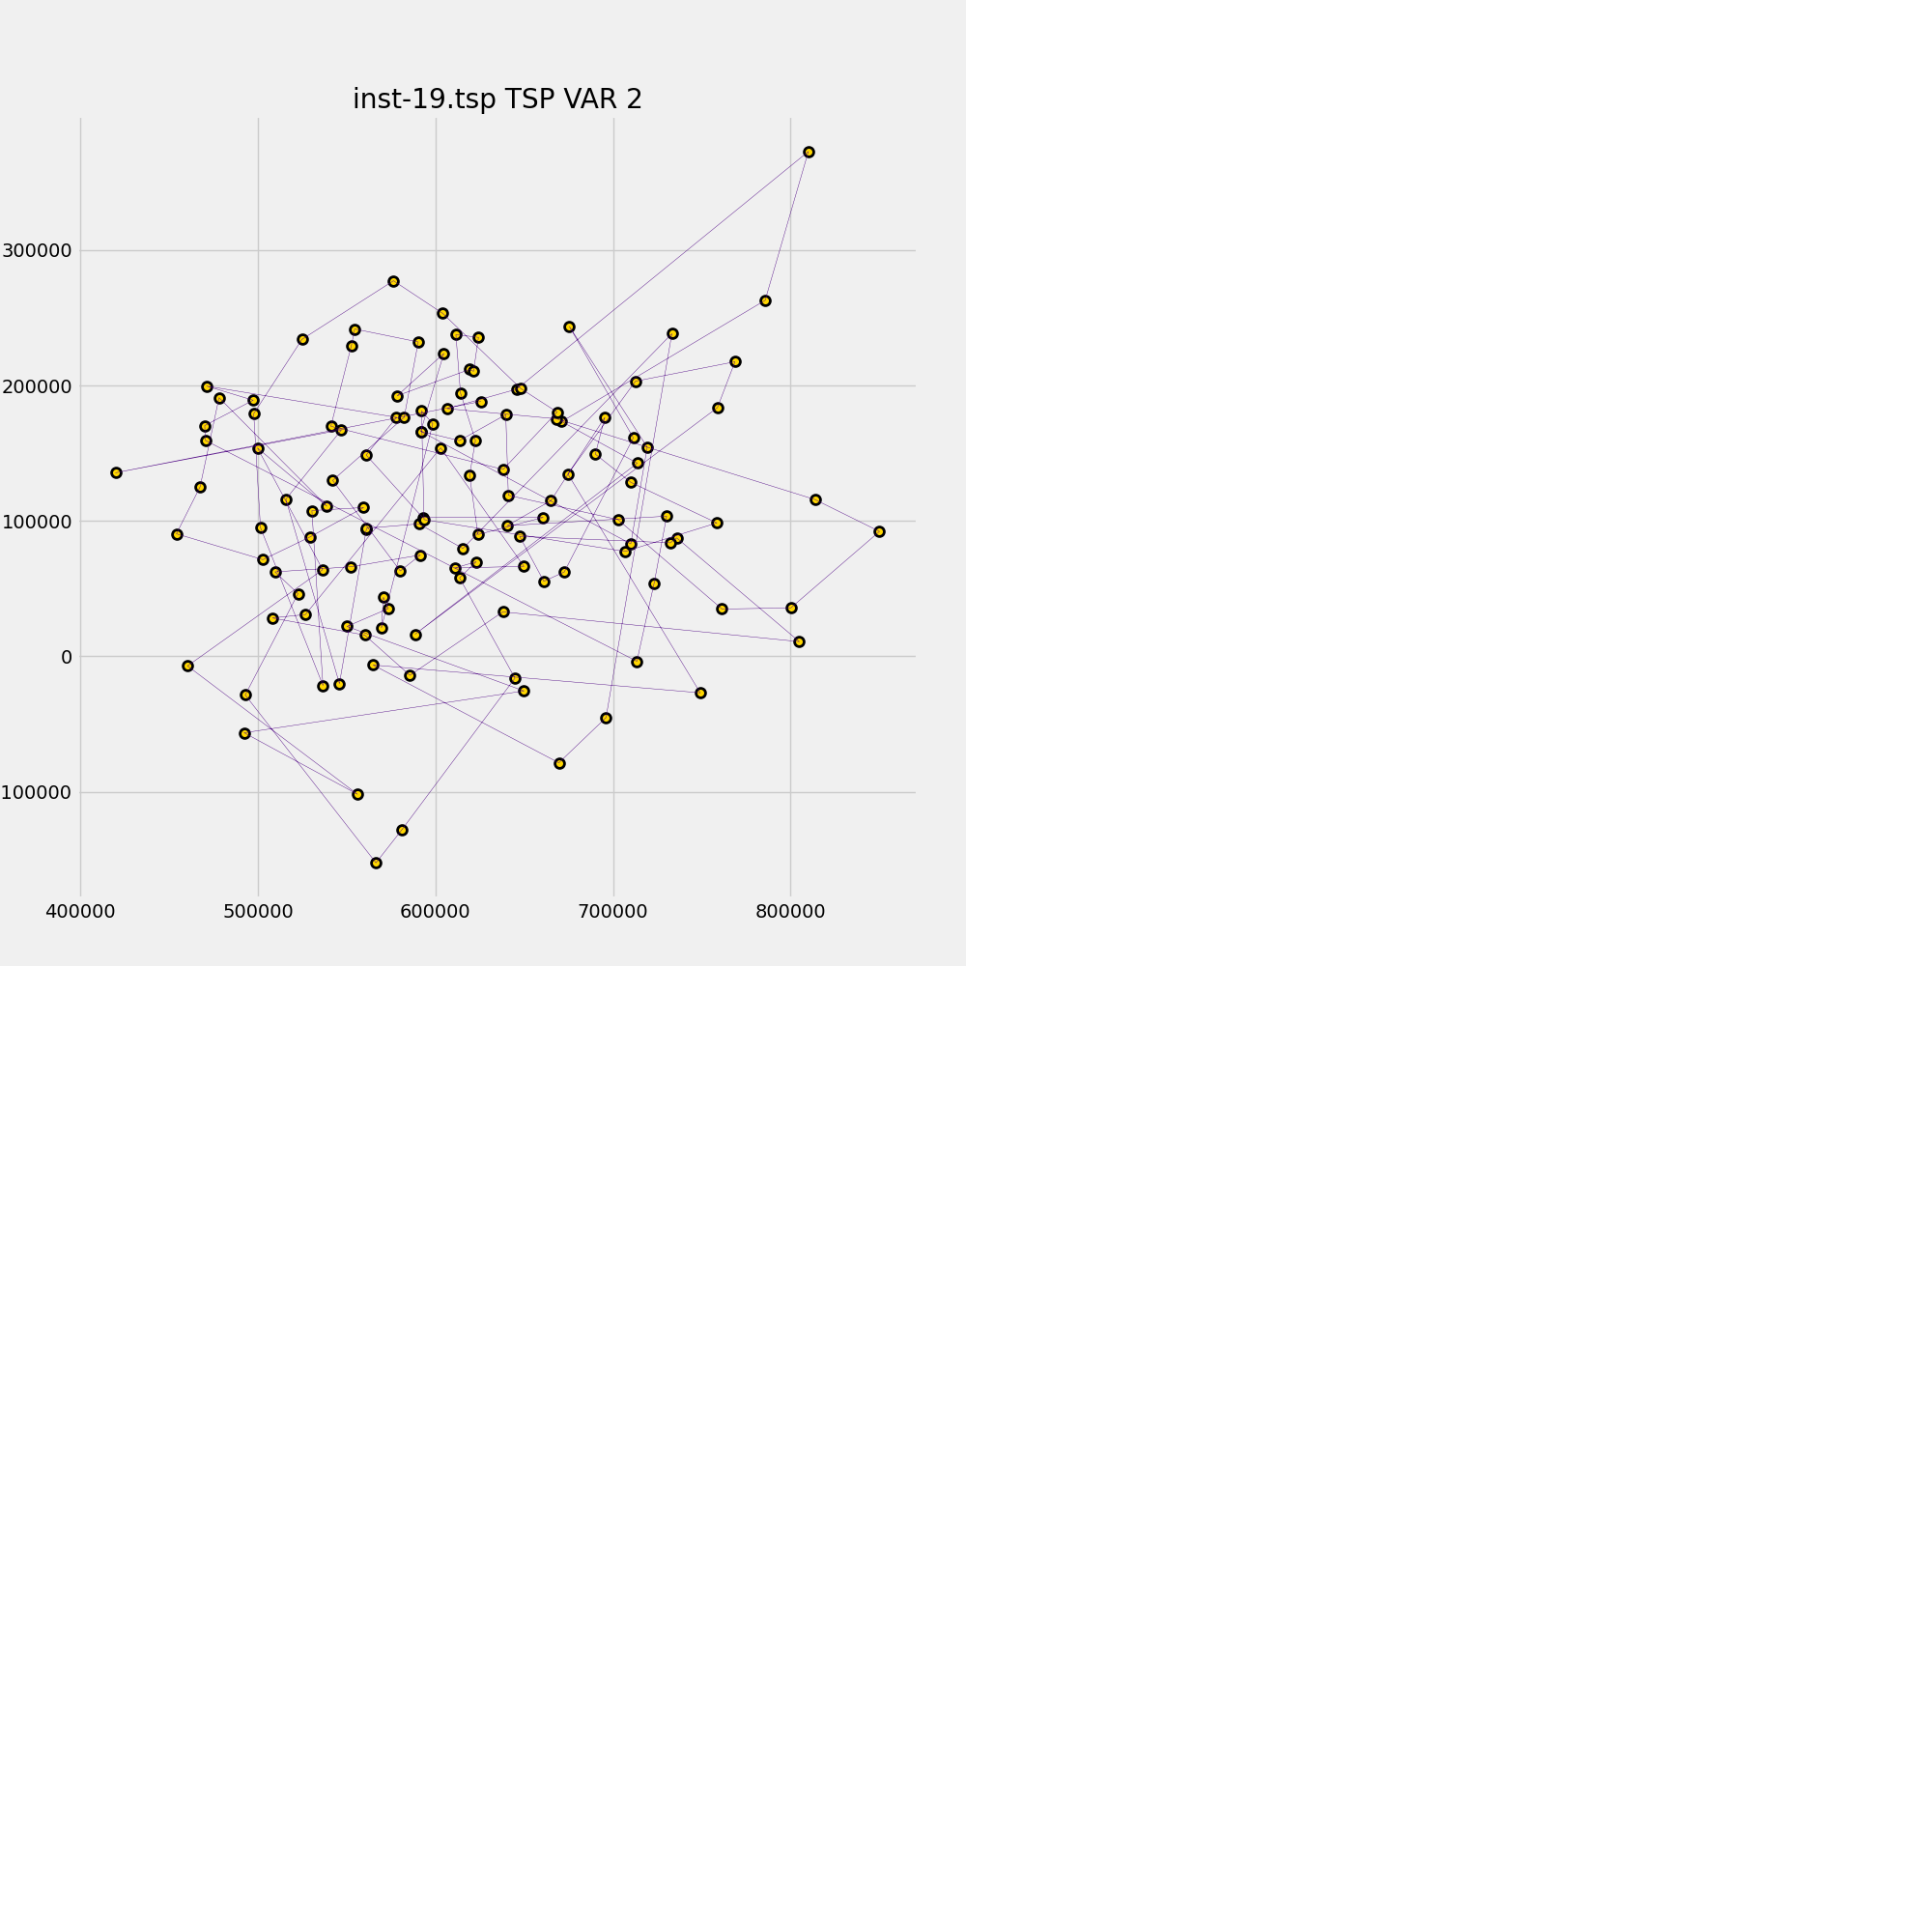

Best Move [52, 54]
Tour Cost 19791480.87470966
Best Move [30, 32]
Tour Cost 19573278.538277432
Best Move [80, 82]
Tour Cost 19568896.432383
Best Move [44, 46]
Tour Cost 19567760.58007186
Best Move [101, 103]
Tour Cost 19511994.00282967
Best Move [52, 55]
Tour Cost 19405440.034433454
Best Move [20, 23]
Tour Cost 19382628.512535155
Best Move [27, 31]
Tour Cost 19281260.311875924
Best Move [113, 115]
Tour Cost 19195617.493523017
Best Move [18, 22]
Tour Cost 18980344.683341652
Best Move [79, 83]
Tour Cost 18848800.13452439
Best Move [30, 33]
Tour Cost 18844813.4896413
Best Move [56, 62]
Tour Cost 18830195.81856729
Best Move [35, 37]
Tour Cost 18827198.951082073
Best Move [99, 101]
Tour Cost 18567369.27325455
Best Move [33, 35]
Tour Cost 18377436.95206122
Best Move [111, 114]
Tour Cost 18355182.272197157
Best Move [82, 85]
Tour Cost 18253633.585582256
Best Move [117, 119]
Tour Cost 18222821.451256838
Best Move [57, 59]
Tour Cost 18183727.630491268
Best Move [85, 87]
Tour Cost 18163199.39954

Best Move [95, 97]
Tour Cost 10611272.991871707
Best Move [79, 122]
Tour Cost 10521073.851848686
Best Move [81, 112]
Tour Cost 10517939.95901333
Best Move [21, 37]
Tour Cost 10463988.594977247
Best Move [110, 118]
Tour Cost 10394314.266613297
Best Move [89, 99]
Tour Cost 10352054.428438686
Best Move [99, 106]
Tour Cost 10333679.809632052
Best Move [85, 94]
Tour Cost 10329780.827437293
Best Move [53, 91]
Tour Cost 10326718.011274368
Best Move [92, 99]
Tour Cost 10288928.495857183
Best Move [66, 70]
Tour Cost 10269280.788273785
Best Move [101, 109]
Tour Cost 10226040.773062162
Best Move [22, 39]
Tour Cost 10118839.083269972
Best Move [68, 70]
Tour Cost 10104591.166187692
Best Move [25, 78]
Tour Cost 10095163.842163704
Best Move [38, 55]
Tour Cost 10060896.45286718
Best Move [19, 76]
Tour Cost 10050152.083391648
Best Move [48, 70]
Tour Cost 10005159.82622847
Best Move [116, 126]
Tour Cost 9976359.718800308
Best Move [29, 31]
Tour Cost 9936599.629079694
Best Move [87, 96]
Tour Cost 9912178

<IPython.core.display.Javascript object>


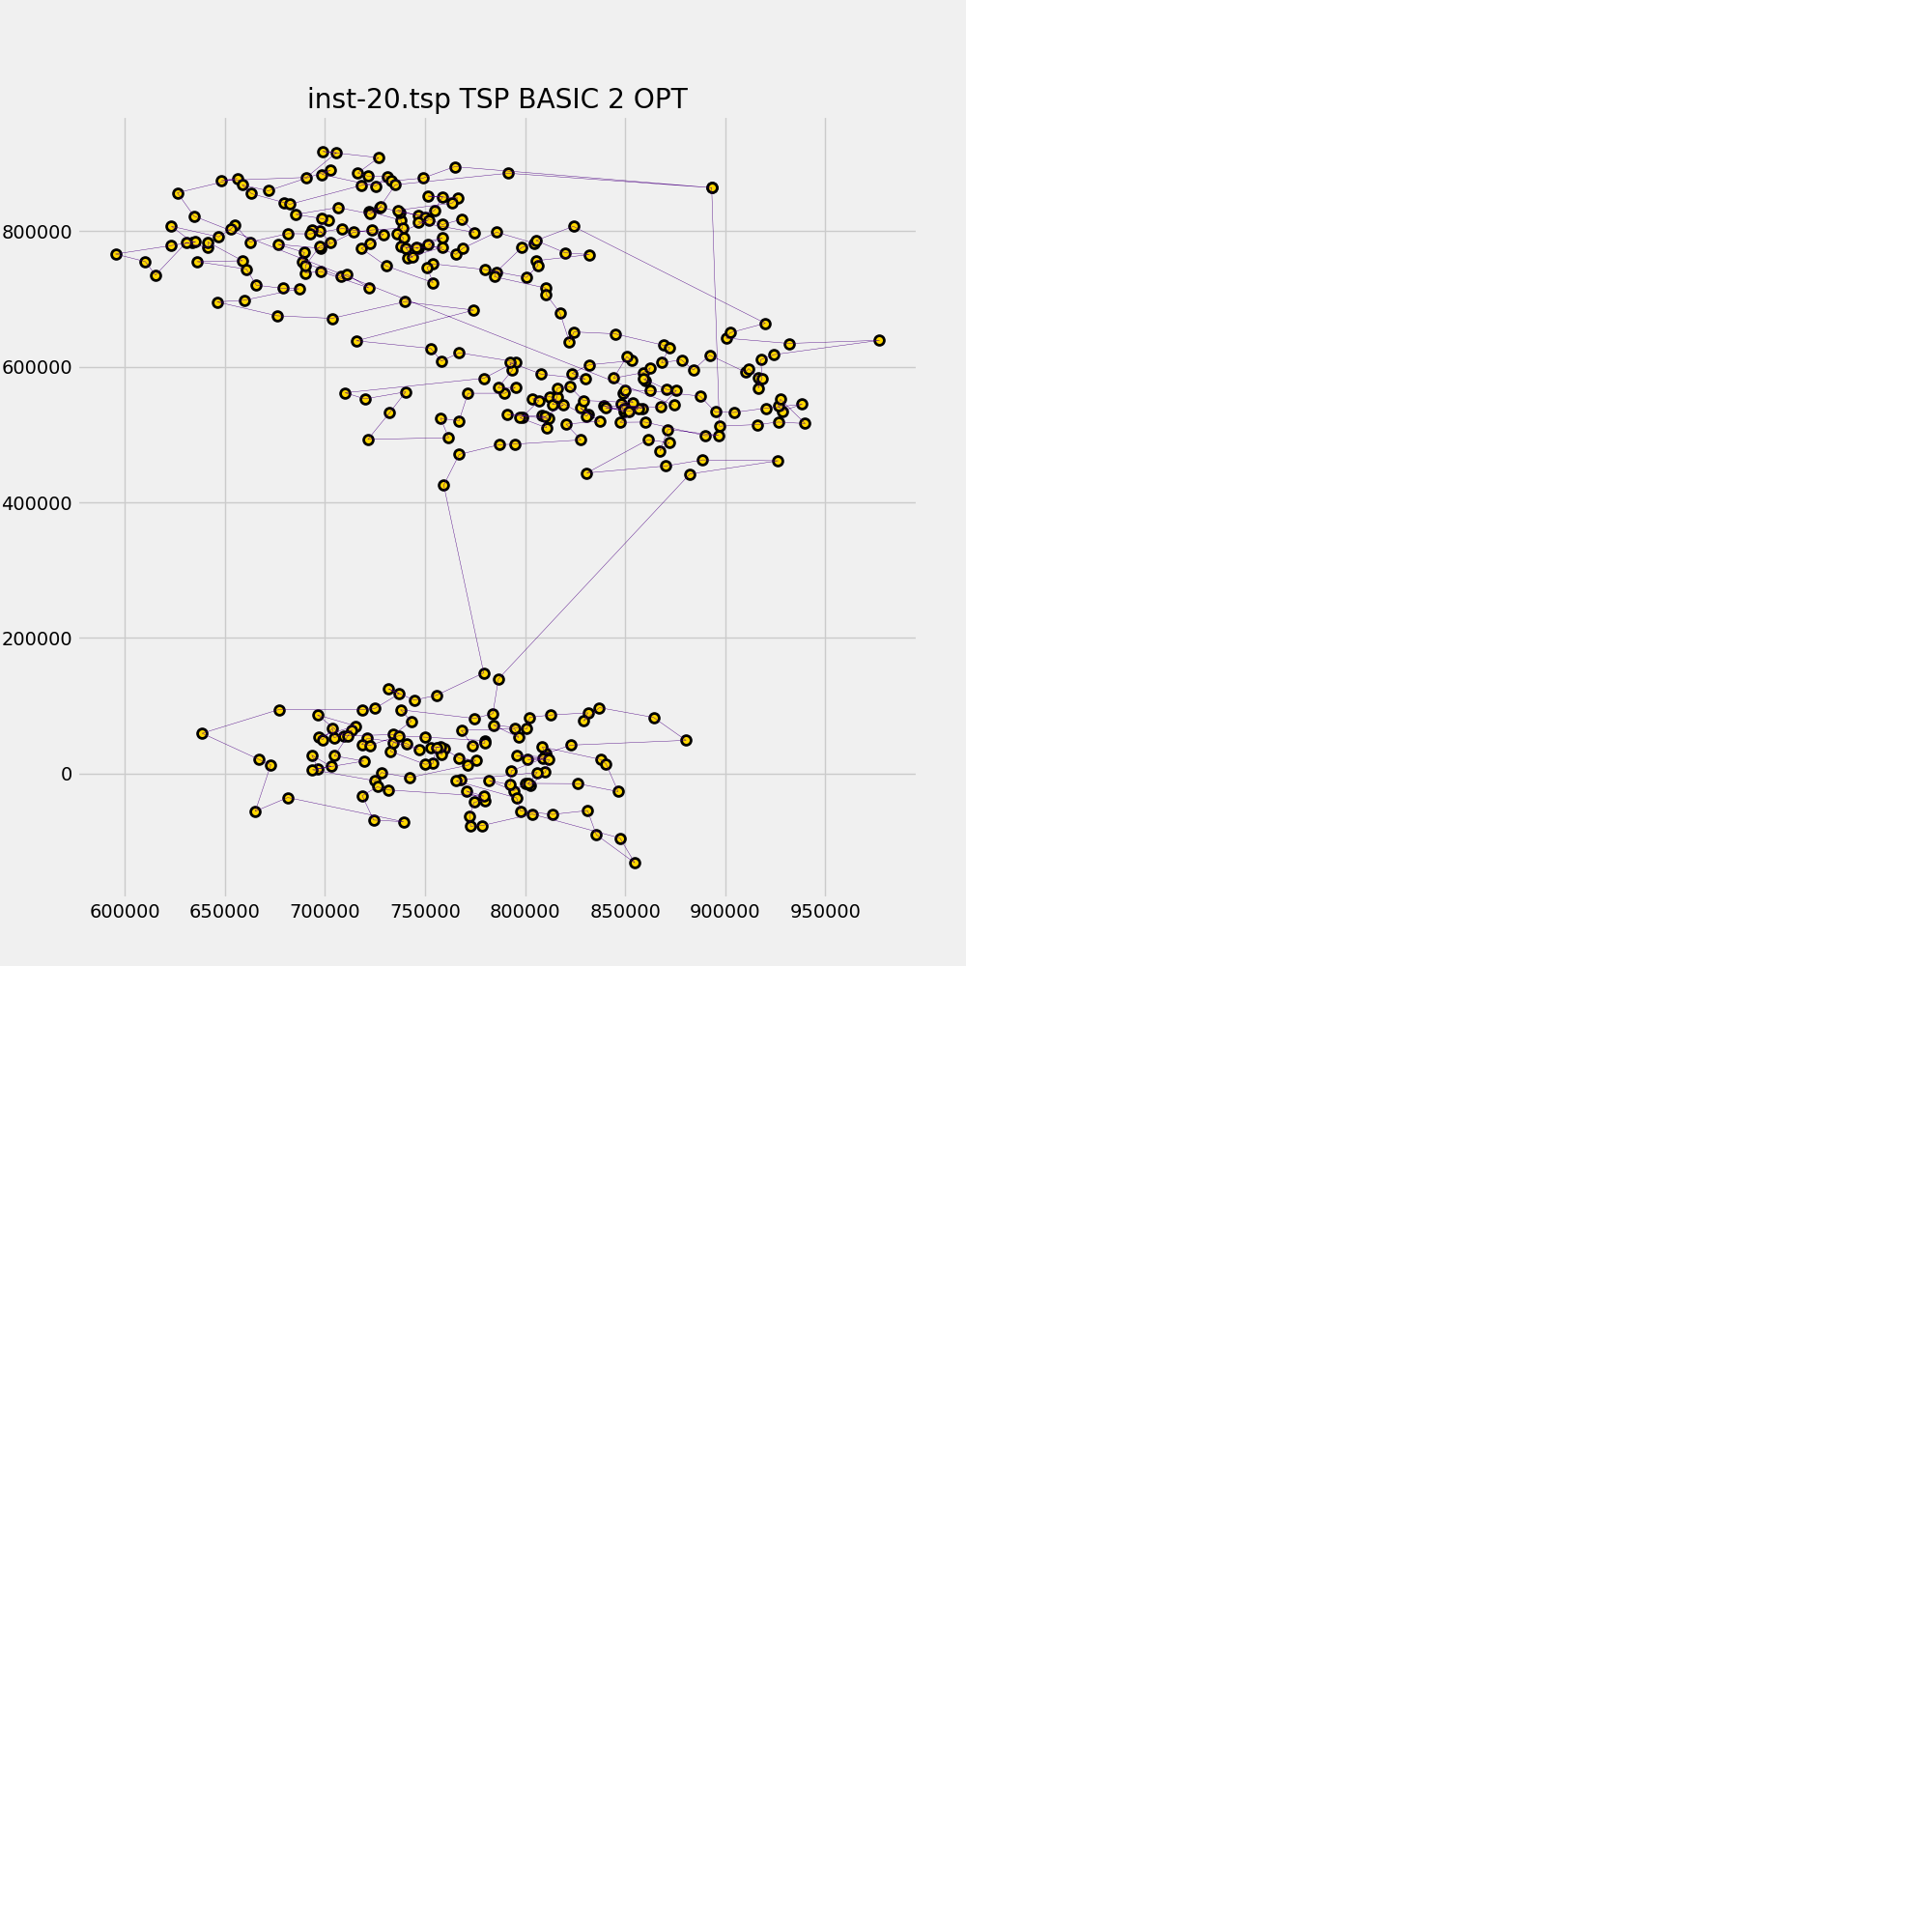

Best Move [47, 323]
Tour Cost 138715764.25053436
Best Move [92, 360]
Tour Cost 136994771.7470459
Best Move [266, 303]
Tour Cost 135299600.678832
Best Move [251, 255]
Tour Cost 133611507.41429937
Best Move [214, 326]
Tour Cost 131927409.97913921
Best Move [202, 356]
Tour Cost 130283569.30005349
Best Move [44, 322]
Tour Cost 128684890.94398017
Best Move [10, 115]
Tour Cost 127084586.54059544
Best Move [106, 355]
Tour Cost 125479553.31026798
Best Move [134, 262]
Tour Cost 123883118.91552648
Best Move [37, 284]
Tour Cost 122305660.4751162
Best Move [17, 111]
Tour Cost 120709835.77767867
Best Move [33, 182]
Tour Cost 119073123.33576512
Best Move [149, 347]
Tour Cost 117516168.9499754
Best Move [344, 350]
Tour Cost 115971082.68091674
Best Move [288, 305]
Tour Cost 114429382.0667003
Best Move [93, 310]
Tour Cost 112924875.06606282
Best Move [203, 309]
Tour Cost 111429685.22333477
Best Move [101, 275]
Tour Cost 109938259.32938467
Best Move [23, 218]
Tour Cost 108475573.28418343
Best Move [211,

Best Move [200, 244]
Tour Cost 14659917.53130077
Best Move [278, 312]
Tour Cost 14564718.305102872
Best Move [312, 318]
Tour Cost 14467750.057248592
Best Move [157, 299]
Tour Cost 14372715.875956386
Best Move [172, 307]
Tour Cost 14267062.487415586
Best Move [242, 272]
Tour Cost 14173861.71941674
Best Move [257, 287]
Tour Cost 14068142.612121137
Best Move [155, 179]
Tour Cost 13978800.825354904
Best Move [233, 292]
Tour Cost 13889463.433098525
Best Move [149, 351]
Tour Cost 13803341.417809837
Best Move [201, 352]
Tour Cost 13714833.098595409
Best Move [92, 125]
Tour Cost 13630967.956592962
Best Move [3, 120]
Tour Cost 13542678.385618942
Best Move [242, 349]
Tour Cost 13463441.15638429
Best Move [62, 124]
Tour Cost 13384221.785430484
Best Move [49, 95]
Tour Cost 13280371.843345843
Best Move [245, 345]
Tour Cost 13201527.150227722
Best Move [265, 274]
Tour Cost 13124666.564684156
Best Move [180, 235]
Tour Cost 13048004.416760225
Best Move [188, 193]
Tour Cost 12971630.898942271
Best Move

KeyboardInterrupt: 

In [2]:
for i in ["inst-19.tsp","inst-20.tsp","inst-7.tsp"]:
    tsp_ = tsp(i)
    tsp_.basic_two_opt_search()
    del tsp_
    tsp_ = tsp(i)
    tsp_.var_1_edge_two_opt_search()
    del tsp_
    tsp_ = tsp(i)
    tsp_.var_2_first_edge_two_opt_search()
    del tsp_